# 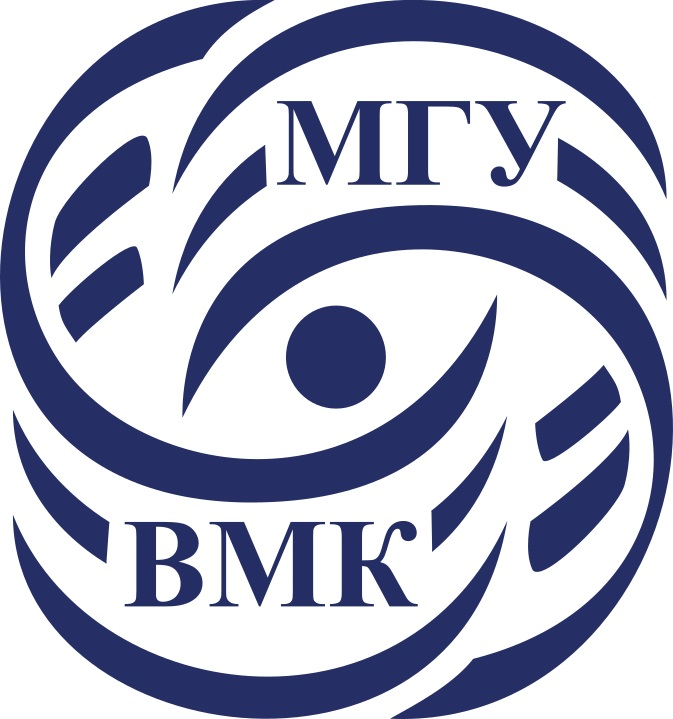

# Машинное обучение. ВМК МГУ

## Практическое задание 3: Knn: классификация и регрессия

### Важно! О формате сдачи

* Все задания, кроме двух на реализацию кода, в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст


### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)



In [4]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
! pip install -r /content/requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
To: /content/requirements.txt
100% 424/424 [00:00<00:00, 1.20MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 97.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.4 MB/s eta 0:00

Проверим версию библиотеки:

In [4]:
import catboost
assert(catboost.__version__ == '1.2.1')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

# Часть 0. Знакомство с библиотекой scikit-learn

`Scikit-learn` - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

-----

Каждый **<font color=orange>модуль предобработки</font>** данных имеет два метода: `fit` и `transform`.

* Как правило, метод `fit` принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики.
* Метод `transform` преобразует входные данные, используя статистики, посчитанные при вызове метода `fit` и возвращает преобразованные данные.

Выборка $X$ представляется в виде матрицы размера `(n_samples, n_features)`, то есть каждому *объекту* соответствует отдельная строка, а каждому* признаку* - отдельный столбец.

------

Каждая **<font color=orange>модель машинного обучения</font>** имеет два метода: `fit` - метод ответственный за обучения модели и `predict` - метод ответственный за предсказание целевой переменной.
* Как правило, метод `fit` принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки.
* Метод `predict` принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных.
* В моделях классификации бывает метод `predict_proba`, который принимает на вход набор данных и выдает вероятности принадлежности классам.

Если нами решается задача *классификации*, то вектор целевых переменных $y$ содержит целые числа (или другое множество дискретных величин). При решении задачи *регрессии* вектор $y$ содержит вещественные числа.

----
Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

Приведем пример стандартной работы с библиотекой scikit-learn

In [40]:
#Создаем обучающую выборку
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

#Делаем импорт класса K-NN классификатора
from sklearn.neighbors import KNeighborsClassifier

#Создаем объект класса 3-NN классификатора
neigh = KNeighborsClassifier(n_neighbors=3)

#Обучаем классифкатор на созданной ранее выборке
neigh.fit(X, y)

#Предсказываем метку класса нового объекта с помощью метода predict
print(neigh.predict([[1.1]]))

[0]


# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* **Нормализация к распределению с нулевым матожиданием** и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются по каждому признаку (столбцу) отдельно
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждому признаку (столбцу) отдельно

Рассмотрим пример. Ниже приведены: таблица до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

---

**Задание 1.1** (юнит-тесты, 5 баллов) В модуле `scalers.py` реализуйте два вида нормализации признакового пространства. `StandardScaler` - нормализация к распределению с нулевым матожиданием и единичной дисперсией, `MinMaxScaler` - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод `fit` и метод `transform`. Метод `fit `получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод `transform` преобразует данные, используя статистистики, посчитанные при вызове метода `fit`.

Примеры запусков функций можно увидеть в открытых тестах.

**<font color=red>После того, как вы локально реализовали и протестировали модуль scalers.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули</font>**

In [41]:
from scalers import StandardScaler, MinMaxScaler

In [42]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [43]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 14.0MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [44]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [45]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

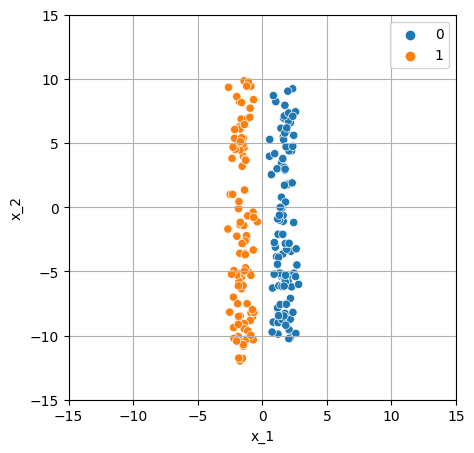

In [46]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [47]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделяющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

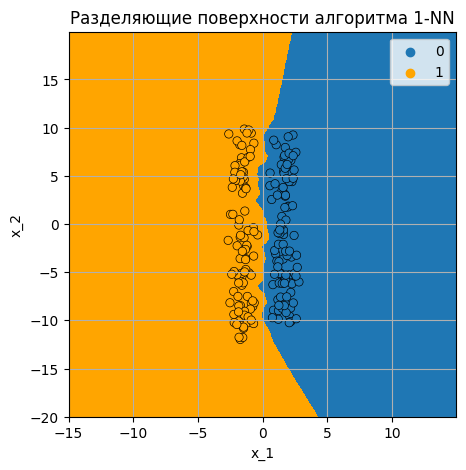

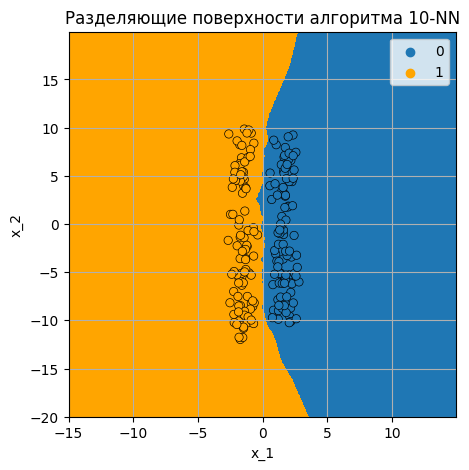

In [48]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**Задание 1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

ВАШ ОТВЕТ: <br>
При k=1 учитывается лишь один ближайший \[к точке предсказания ответа\] сосед. Модель более четко повторяет неровности облаков точек, соответствующих объектам двух представленных классов. Это явно указывает на переобучение: модель слишком "хорошо" подгоняет ответы под обучающую выборку, однако на тестовых данных ее эффективность \[скорее всего\] будет ниже, чем при k=10. <br>
Также при k=1 модель очень чувствительна к выбросам, однако в данном случае этого явно не видно. <br>
При k=10 модель менее склонна к переобучению, и разделяющая поверхность получается менее "шумной", сложной. Эта поверхность в меньшей степени, чем k=1, повторяет контуры облаков точек.

**Задание 1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте строгое математическое обоснование наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией признаков.

ВАШ ОТВЕТ: <br>
Ответ алгоритма в приведенном выше примере: $$\arg\max_a(\sum_{n=1}^{k}I[y(x_i)=a])$$где k - число ближайших соседей (параметр классификатора n_neighbors).<br>
Разделяющая поверхность отклоняется от прямой вследствие сильного разброса значений вдоль оси Ox_2. Пояснение - ниже.<br><br>
Факт №1: Расстояние между объектами (метрика Минковского порядка 2 - это значение по умолчанию в KNeighborsClassifier в sklearn): $$||x^1 - x^2|| = \sqrt{(x_1^1 - x^2_1)^2 + (x^1_2 - x^2_2)^2}$$ где нижние индексы обозначают номер признака (а верхние - номер объекта).<br><br>

Факт №2: Объекты класса 1 в среднем имеют бОльшие по модулю значения признаков x_2, чем объекты класса 0, и вероятность того, что модуль значения признака x_2 у объекта класса 1 будет больше по модулю, чем 10, также больше именно для класса 1.<br><br>
Возьмем случайный объект x* с x_2 > 10 или x_2 < - 10 вблизи прямой x_1 = 0 (|x_1| < 1) <br>
Проведем шар радиусом R
$$f(x_1,x_2) = (x^*_1 - x_1)^2 + (x^*_2 - x_2)^2 \leq R^2$$ такой, что он включает k ближайших к объекту x* соседей.<br>
Предположим, даны объекты x0 класса 0 и x1 класса 1. Тогда ближайший из x1 или x0 определяется знаком след. выражения: $$||x^* - x^0|| - ||x^* - x^1|| $$ Так как значения x_1 практически не влияют на знак выражения выше, а знак этого выражения определяется главным образом значениями x_2 объектов, то, т.к. значения |x_2| больше и в среднем, и по максимуму для класса 1, то объектов класса 1 в данном шаре будет больше. Причем ситуация не изменится при отклонении от x_1 = 0 на некоторый угол. Это означает отклонение разделяющей поверхности от вертикали.
<br><br><br>
После нормализации: максимумы значений x_2 для классов 0 и 1 будут почти равны, как и среднее значение признаков x_2 для объектов разных классов, поэтому такого сдвига уже не будет. Расстояние $$||x^* - x^0|| - ||x^* - x^1|| $$ от некоторого объекта на прямой x_1 = 0 до ближайших объектов x^0 класса 0 и x^1 класса 1 будет примерно равно, и сдвиг вдоль x_2 = const после нормализации уже будет влиять на ответ алгоритма.

---

Данную проблему может решить нормализация признакового пространства.

**Задание 1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$. Менять функцию $plot\_knn\_bound$ нельзя.

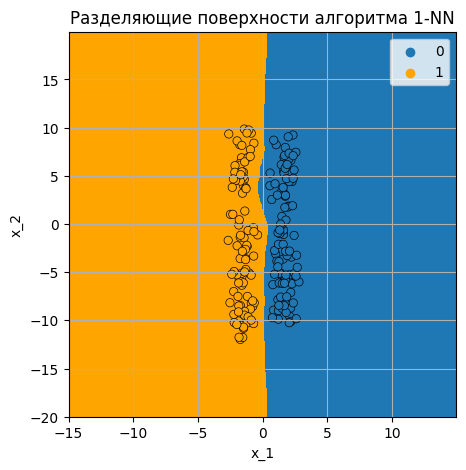

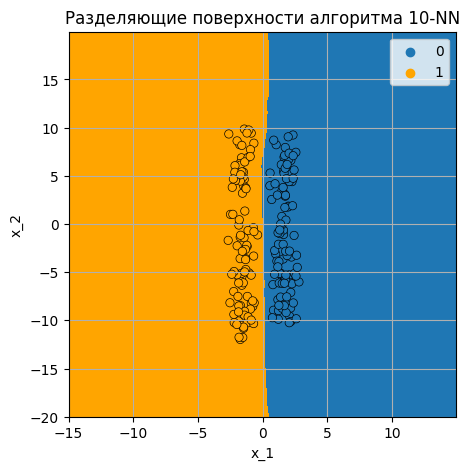

In [49]:
scaler1 = StandardScaler()
scaler1.fit(X)
scaler2 = MinMaxScaler()
scaler2.fit(X)
plot_knn_bound(X, y, scaler=scaler1, n_neighbors=1)
plot_knn_bound(X, y, scaler=scaler2, n_neighbors=10)

**Задание 1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется математически строго, однозначно и с полным обоснованием определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

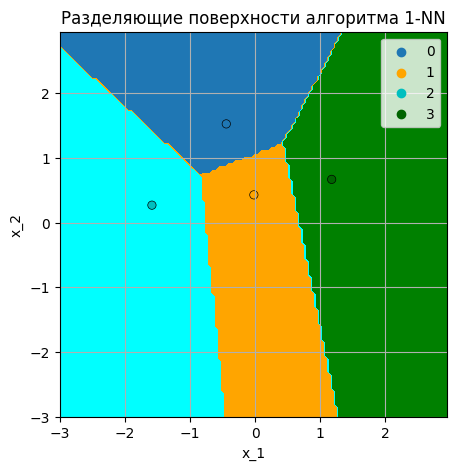

In [50]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

ВАШ ОТВЕТ: <br>
Очевидно, данное разбиение плоскости является **диаграммой Вороного** заданного множества точек.<br>
Ответ алгоритма на произвольном объекте x: $$\arg\max_a(\sum_{n=1}^{k}I[y(x_i)=a])$$ где k=1, а объекты занумерованы в порядке ближайший к x -> самый далёкий от x. Так, объекту x, очевидно, классификатором присваивается тот же класс, что имеет ближайший к нему объект обучающей выборки.<br><br>
Пусть сначала дано ДВА класса (две точки). Разделяющей поверхностью в этом случае является прямая *a*, такая, что $$dist(точка №0, a) = dist(точка№1, a)$$
Эта прямая определяется однозначно как проходящая через середину отрезка, соединяющего точку 0 и точку 1 и перпендикулярная ему.
<br>Пусть точка задана вектором x0, а точка 1 - вектором x1
<br>Запишем условие принадлежности классу в обобщенном варианте. *a* тогда являлась бы гиперплоскостью. Проведем вектор **h**, имеющий начало в точке, заданной вектором $$t_0 = \frac{x1 + x0}2 $$ и имеющий конец - в x1:<br>
Без ограничения общности:<br>
То есть $$ h = x1 - \frac{x1 + x0}2 = \frac{x1 - x0}2$$
Объект принадлежит классу 0, если выполнено: $$\langle x-t_0,\:h \rangle \gt 0 $$ а классу 1, если $$\langle x-t_0,\:a \rangle \lt 0 $$
Разделяющая пов-ть:
$$\langle x-t_0,\:h \rangle = 0 $$<br>
Теперь рассмотрим конфигурацию из трёх точек (считаем, что не совпадают, иначе можно было бы ввести некий "неопределённый класс").
Есть три гиперплоскости: между точками 0 и 1, между точками 1 и 2 и между точками 2 и 0. Считаем, что вектора, задающие точки, следующие:
точка 0 - x0, точка 1 - x1, точка 2 - x2.
Тогда введем следующие обозначения: $$t_{01} = \frac{x1 + x0}2,\;t_{02} = \frac{x2 + x0}2,\;t_{12} = \frac{x2 + x1}2 $$ <br>$$h_{01} = \frac{x1 - x0}2,\;h_{02} = \frac{x2 - x0}2,\;h_{12} = \frac{x2 - x1}2 $$<br>
И приведем примеры: пусть точка принадлежит классу 1. Это задается следующими условиями:
$$ \langle x-t_{01},\:h_{01} \rangle \gt 0, \;\; \langle x-t_{12},\:h_{12} \rangle \lt 0 $$
Пусть точка принадлежит классу 2. Это задается след. условиями:
$$ \langle x-t_{02},\:h_{02} \rangle \gt 0, \;\; \langle x-t_{12},\:h_{12} \rangle \gt 0 $$<bR>
Аналогично в системе с n точками принадлежность некоторому классу i будет определяться n-1 неравнеством.<br>
*Вывод*: множество, на котором объект классифицируется как принадлежащий некоторому классу i, является **полиэдром (без границы)**. Разделяющая поверхность, соответственно, будет **границей полиэдра**.
<br> Приведем пример условий, задающий разделяющую поверхность для нашего случая с тремя точками. В системе с n точками они будут *совершенно аналогичными*.<br>
Итак, поверхность, отделяющая класс 1 от 0 и 2:
$$ \{x\;\;|\;\; \langle x-t_{01},\:h_{01} \rangle \ge 0, \;\; \langle x-t_{12},\:h_{12} \rangle \le 0 \} \;\cap\; (\{x\;\;|\;\; \langle x-t_{01},\:h_{01} \rangle = 0\} \;\; \cup \;\;\{x\;\;|\;\; \langle x-t_{12},\:h_{12} \rangle = 0\})$$<br>
В системе из n точек будет n-1 неравенство и n-1 равенство (см. пример выше). Совершенно аналогично. *Это и есть ГМТ точек разделяющих некоторый класс i и все остальные из рассматриваемых классов* Все поверхности, соотвественно, будут объединением соответствующих множеств.

# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому `кросс-валидация`.  

Пусть зафиксирован некоторый набор гиперпараметров модели. В $KNN$ под гиперпараметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$.

* При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds).
* Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold).
* Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной.
* Финальным значением метрики качества для модели с заданными параметрами является *среднее полученных нами значений* на $n$ фолдах.



*Подумайте, как в описанную выше схему корректно добавить обучение нормализаторов*



Принцип работы кросс-валидации схематично изображен на рисунке.

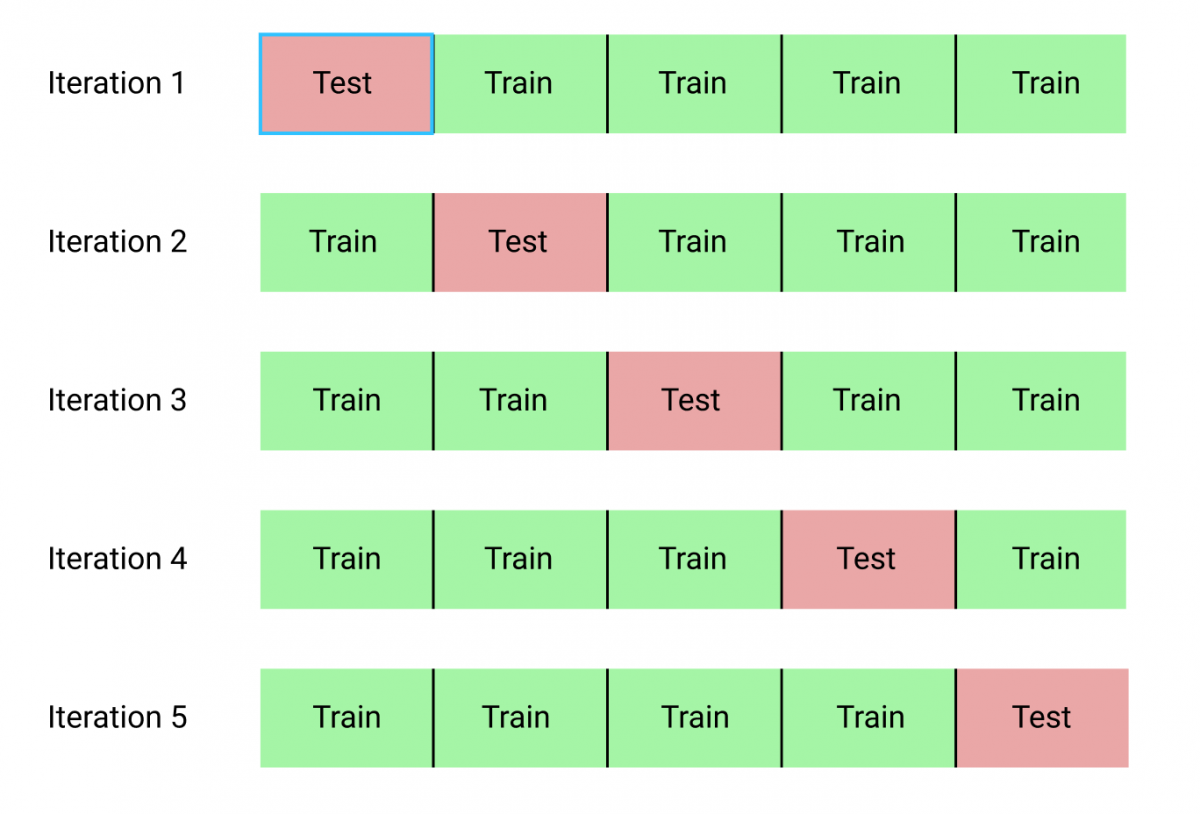

Небольшое видео объяснение о том, как работает кросс-валидация, можно посмотреть по [ссылке](https://www.youtube.com/watch?v=fSytzGwwBVw)

-----------
<font color="white" style="opacity:0.2023"></font>

**Задание 2.1** (юнит-тесты, 12 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

----

Далее будем решать задачу предсказания цены дома в Калифорнии с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true_i))^2}$

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [52]:
X, y = fetch_california_housing(return_X_y=True)

**Задание 2.2** (кросс, 2 балла) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Используйте параметр **random_state=42!** Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Модуль $KNN$-регрессии следует импортировать из sklearn.neighbors. Параметры для перебора описаны ниже

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}
score_function = r2_score

**<font color=red>После того, как вы локально реализовали и протестировали модуль cross_val.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки</font>**

In [77]:
from cross_val import kfold_split, knn_cv_score
from sklearn.neighbors import KNeighborsRegressor
k_folds = 3
folds = kfold_split(len(X_train), k_folds)
scores = knn_cv_score(X_train, y_train, parameters, score_function, folds, KNeighborsRegressor)

In [84]:
print(max(scores, key=scores.get), max(scores.values()))

('MinMax', 10, 'euclidean', 'distance') 0.7035316821435433


**Задание 2.3** (кросс, 2 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.


Выведите результаты кросс-валидации

In [88]:
for key in scores:
    print(key, ': ', scores[key])

('None', 1, 'euclidean', 'uniform') :  -0.2698362539419594
('MinMax', 1, 'euclidean', 'uniform') :  0.5329368736058075
('Standard', 1, 'euclidean', 'uniform') :  0.5139255367340351
('None', 1, 'euclidean', 'distance') :  -0.2698362539419594
('MinMax', 1, 'euclidean', 'distance') :  0.5329368736058075
('Standard', 1, 'euclidean', 'distance') :  0.5139255367340351
('None', 1, 'cosine', 'uniform') :  0.10527040776150857
('MinMax', 1, 'cosine', 'uniform') :  0.4590323476108448
('Standard', 1, 'cosine', 'uniform') :  0.47958515234726945
('None', 1, 'cosine', 'distance') :  0.1052704077615086
('MinMax', 1, 'cosine', 'distance') :  0.4590323476108448
('Standard', 1, 'cosine', 'distance') :  0.47958515234726945
('None', 5, 'euclidean', 'uniform') :  0.0977684191856583
('MinMax', 5, 'euclidean', 'uniform') :  0.6915621333110309
('Standard', 5, 'euclidean', 'uniform') :  0.6793573692425973
('None', 5, 'euclidean', 'distance') :  0.1199731657678866
('MinMax', 5, 'euclidean', 'distance') :  0.6964

In [89]:
print(max(scores, key=scores.get), max(scores.values()))

('MinMax', 10, 'euclidean', 'distance') 0.7035316821435433


ВАШ ОТВЕТ: наибольший r2_score на валидации = 0.7035316821435433. Такой r2_score у набора параметров ('MinMax', 10, 'euclidean', 'distance')<br>
Больше соседей - выше средний r2_score. Без нормализации результаты неудовлетворительные - r2_score самый низкий, при этом если применить MinMaxScaler или StandardScaler, то r2_score примерно одинаков. Также можно заметить, что применение весов 'distance' увеличивает пригодность модели - r2_score становится немного, но выше

Обучите модель с лучшими по валидации параметрами на обучающей выборке

In [92]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_scaled = normalizer.transform(X_train)

knn = KNeighborsRegressor(n_neighbors=10, metric='euclidean', weights='distance')
knn.fit(X_train_scaled, y_train)
X_test_scaled = normalizer.transform(X_test)
y_pred = knn.predict(X_test_scaled)

score = score_function(y_test, y_pred)

In [93]:
print(score)

0.7117082182374788


Ответ: r2_score на test составляет 0.7117082182374788

----------------
<font color="white" style="opacity:0.2023"></font>

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов среди всех объектов выборки.

In [94]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [95]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [96]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [100]:
X_train = np.array(X_train, dtype=object)

In [101]:
X_test = np.array(X_test, dtype=object)

In [102]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF). Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [103]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

**Задание 3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [105]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [106]:
k_folds = 3
score_function = accuracy_score
folds = kfold_split(len(X_train), k_folds)
scores = knn_cv_score(X_train, y_train, parameters, score_function, folds, KNeighborsClassifier)

**Задание 3.2** (кросс, 2 балла) Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [108]:
for key in scores:
    print(key, ': ', scores[key])

('CountVectorizer', 1, 'cosine', 'uniform') :  0.672087658236065
('TfidfVectorizer', 1, 'cosine', 'uniform') :  0.6936529067480152
('CountVectorizer', 1, 'cosine', 'distance') :  0.672087658236065
('TfidfVectorizer', 1, 'cosine', 'distance') :  0.6936529067480152
('CountVectorizer', 2, 'cosine', 'uniform') :  0.6110139528291619
('TfidfVectorizer', 2, 'cosine', 'uniform') :  0.6346121200480795
('CountVectorizer', 2, 'cosine', 'distance') :  0.6722644460023516
('TfidfVectorizer', 2, 'cosine', 'distance') :  0.6936529067480152
('CountVectorizer', 3, 'cosine', 'uniform') :  0.6175544674577872
('TfidfVectorizer', 3, 'cosine', 'uniform') :  0.6405339477973659
('CountVectorizer', 3, 'cosine', 'distance') :  0.6675804372619494
('TfidfVectorizer', 3, 'cosine', 'distance') :  0.6917972913602056
('CountVectorizer', 4, 'cosine', 'uniform') :  0.6152563671013902
('TfidfVectorizer', 4, 'cosine', 'uniform') :  0.6429204420369062
('CountVectorizer', 4, 'cosine', 'distance') :  0.6666081982842588
('Tfi

In [109]:
print(max(scores, key=scores.get), max(scores.values()))

('TfidfVectorizer', 1, 'cosine', 'uniform') 0.6936529067480152


ВАШ ОТВЕТ: Набор ('TfidfVectorizer', 1, 'cosine', 'uniform') дает наилучший результат.<br>TfidfVecotrizer дает больший r2_score везде, так как выполняет своего рода **нормализацию**: слова, встречающиеся очень редко в документах в принципе, но, например, часто (относительно других документов) встречающиеся в данном документе, практически не будут учтены при классификации, хотя несут в себе важную информацию. Ранее уже было показано, почему нормализация важна, а также были продемонстрированы r2_score с нормализацией и без неё для конкретного примера.

**Задание 3.3** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

In [114]:
x_vals = np.arange(1, 11)
y_vals = [np.mean([scores[('CountVectorizer', i, 'cosine', 'uniform')],
                 scores[('TfidfVectorizer', i, 'cosine', 'uniform')],
                 scores[('CountVectorizer', i, 'cosine', 'distance')],
                 scores[('TfidfVectorizer', i, 'cosine', 'distance')]]) \
                    for i in range(1, 11)]

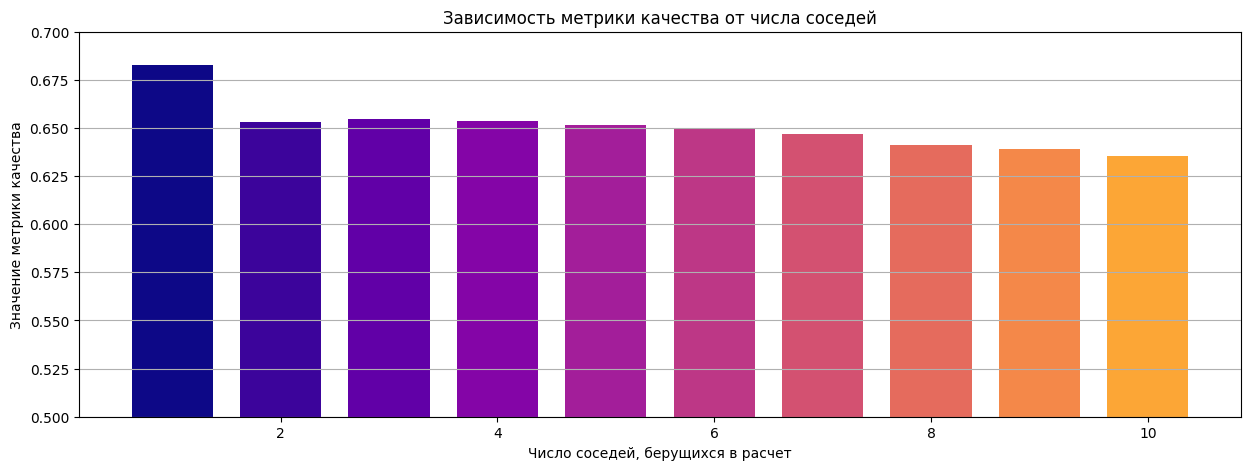

In [155]:
import matplotlib.pyplot as plt
width = 15
plt.figure(figsize=(width, 5))
plt.title('Зависимость метрики качества от числа соседей')
plt.grid(axis='y')
plt.ylabel('Значение метрики качества',  fontsize=10)
plt.xlabel('Число соседей, берущихся в расчет',  fontsize=10)

plt.ylim(0.5, 0.7)

plt.bar(x_vals, y_vals, width / len(x_vals) / 2, color = plt.cm.plasma(np.linspace(0, 0.8, 10)), alpha=1)

plt.show()

In [162]:
print(*fetch_20newsgroups().target_names, sep='\n')

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


Наилучшая метрика качества - при только лишь одном ближайшем соседе. Скорее всего, так получается из-за того, что есть разные классы, тексты в которых могут имеют значительное сходство по ключевым словам, причем, вероятно, есть мало похожих по ключевым словам статей внутри одного класса, иначе метрика так бы не проседала при большем числе соседей. Поэтому при взятии в расчет двух и более соседей вероятность ошибки растет.

**Задание 3.4** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [171]:
normalizer = tf_idf
normalizer.fit(X_train)
X_train_scaled = normalizer.transform(X_train)

knn = KNeighborsClassifier(n_neighbors=1, metric='cosine', weights='uniform')
knn.fit(X_train_scaled, y_train)
X_test_scaled = normalizer.transform(X_test)
y_pred = knn.predict(X_test_scaled)

score = score_function(y_test, y_pred)

In [172]:
print(score)

0.5315985130111525


In [175]:
normalizer = tf_idf
normalizer.fit(X_train)
X_train_scaled = normalizer.transform(X_train)

knn = KNeighborsClassifier(n_neighbors=9, metric='cosine', weights='distance')
knn.fit(X_train_scaled, y_train)
X_test_scaled = normalizer.transform(X_test)
y_pred = knn.predict(X_test_scaled)

score = score_function(y_test, y_pred)

In [176]:
print(score)

0.5529739776951673


ОТВЕТ: Возможно, данные в датасете расположены группами - последовательно по классам. Тогда, так как функция kfold_split выбирает именно последовательные индексы, это могло внести в модель некоторый сдвиг. Возможно также, что в тестовой выборке больше "редких" классов, которых было мало в обучающей выборке.
Кстати, лучшие на кросс-валидации параметры уступают на тесте менее успешным на кросс-валидации.